# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [2]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import patsy
import statsmodels.api as sm

In [3]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [4]:
reg = smf.ols('tip ~  smoker + net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           4.56e-22
Time:                        15:21:27   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172      0.000       0.839       1.625
smoker[T.No]     0.1385      0.150      0.923      0.357      -0.157       0.434
net_bill         0.1001      0.009     11.015      0.000       0.082       0.118
==============================================================================
Omnibus:                       37.031   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.928
Skew:                           0.809   Prob(JB):                     2.93e-15
Kurtosis:                       4.991   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. Se assumirmos que os valores estatiscamente insignificantes são aqueles com o valor de 'P>|t|' maior que 0.5, então, no modelo acima, as colunas 'sex' e 'time' são as que devem ser removidas.

Text(0, 0.5, 'resíduo')

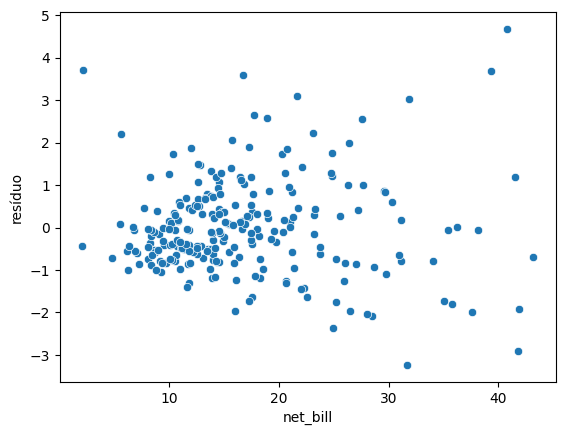

In [5]:
# 3.
sns.scatterplot(x= tips['net_bill'], y = reg.resid, data=tips)
plt.xlabel('net_bill')
plt.ylabel('resíduo')

In [6]:
#4. Criando um modelo com log de 'net_bill'
reg_log = smf.ols('tip ~  smoker + np.log(net_bill)', data = tips).fit()
reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           5.38e-19
Time:                        15:21:31   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2890      0.445     -2.896      0.004      -2.166      -0.412
smoker[T.No]         0.0433      0.154      0.282      0.779      -0.260       0.347
np.log(net_bill)     1.5712      0.157     10.034      0.000       1.263       1.880
==============================================================================
Omnibus:                       75.168   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.823
Skew:                           1.320   Prob(JB):                     3.38e-50
Kurtosis:                       6.929   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'resíduo')

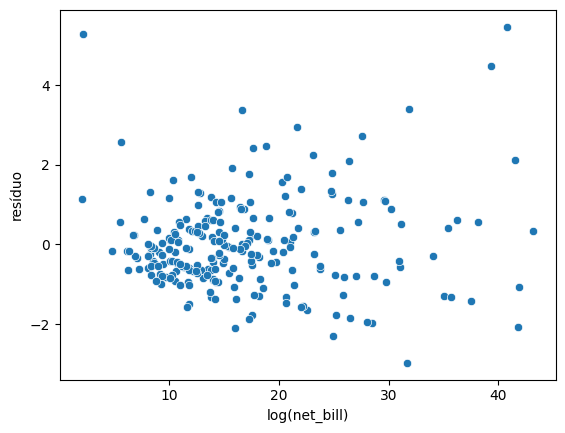

In [7]:
#Iremos também observar os residuos destes modelos, para melhor compreensão, ambos em função de 'net_bill', para fins de comparação
sns.scatterplot(x= tips['net_bill'], y = reg_log.resid, data=tips)
plt.xlabel('log(net_bill)')
plt.ylabel('resíduo')

In [8]:
#Criando um modelo com polinomio de 'net_bill'
reg_pol = smf.ols('tip ~  smoker + np.power(net_bill,2)', data = tips).fit()
reg_pol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     52.69
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           1.04e-19
Time:                        15:21:36   Log-Likelihood:                -380.70
No. Observations:                 244   AIC:                             767.4
Df Residuals:                     241   BIC:                             777.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.1421      0.147     14.586      0.000       1.853       2.431
smoker[T.No]              0.1696      0.154      1.102      0.271      -0.133       0.473
np.power(net_bill, 2)     0.0022      0.000     10.265      0.000       0.002       0.003
==============================================================================
Omnibus:                       25.317   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.501
Skew:                           0.672   Prob(JB):                     1.95e-08
Kurtosis:                       4.298   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'resíduo')

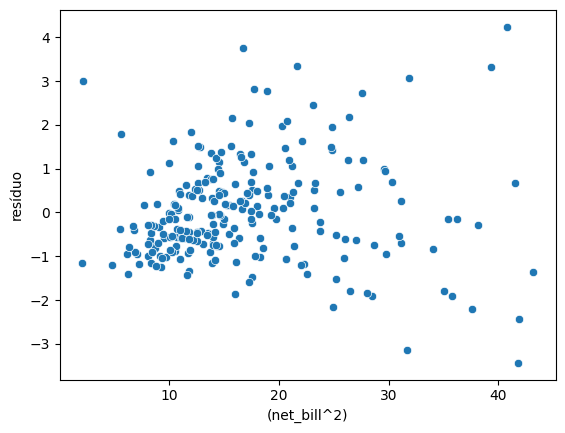

In [9]:
sns.scatterplot(x= tips['net_bill'], y = reg_pol.resid, data=tips)
plt.xlabel('(net_bill^2)')
plt.ylabel('resíduo')

Dos 3 modelos vistos, o primeiro, com a variável 'net_bill' sem tratamento é o mais eficiente, pois este não só possui o maior valor de r-quadrado, mas também possui o resíduo mais bem distribuido.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [10]:
#1. Construindo a matriz de design
y, X = patsy.dmatrices('tip ~  smoker + net_bill', tips)

In [11]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           4.56e-22
Time:                        15:21:42   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172      0.000       0.839       1.625
smoker[T.No]     0.1385      0.150      0.923      0.357      -0.157       0.434
net_bill         0.1001      0.009     11.015      0.000       0.082       0.118
==============================================================================
Omnibus:                       37.031   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.928
Skew:                           0.809   Prob(JB):                     2.93e-15
Kurtosis:                       4.991   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. Novamente, as variáveis a serem removidas são 'sex' e 'time'.

Text(0, 0.5, 'resíduo')

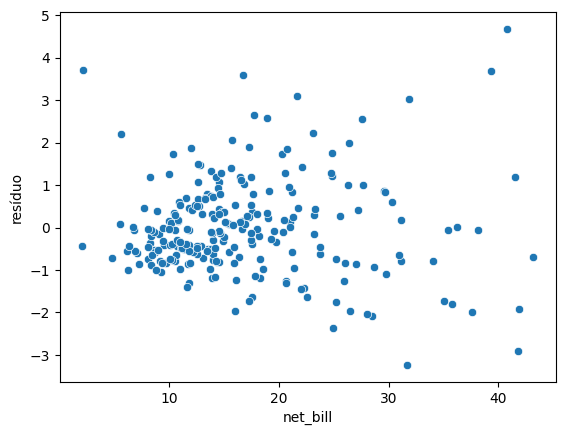

In [12]:
sns.scatterplot(x= tips['net_bill'], y = model.resid, data=tips)
plt.xlabel('net_bill')
plt.ylabel('resíduo')

In [13]:
y_log, X_log = patsy.dmatrices('tip ~  smoker + np.log(net_bill)', tips)
model_log = sm.OLS(y_log,X_log).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           5.38e-19
Time:                        15:21:46   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2890      0.445     -2.896      0.004      -2.166      -0.412
smoker[T.No]         0.0433      0.154      0.282      0.779      -0.260       0.347
np.log(net_bill)     1.5712      0.157     10.034      0.000       1.263       1.880
==============================================================================
Omnibus:                       75.168   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.823
Skew:                           1.320   Prob(JB):                     3.38e-50
Kurtosis:                       6.929   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
y_pol, X_pol = patsy.dmatrices('tip ~  smoker + np.power(net_bill,2)', tips)
model_pol = sm.OLS(y_pol,X_pol).fit()
model_pol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     52.69
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           1.04e-19
Time:                        15:21:48   Log-Likelihood:                -380.70
No. Observations:                 244   AIC:                             767.4
Df Residuals:                     241   BIC:                             777.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.1421      0.147     14.586      0.000       1.853       2.431
smoker[T.No]              0.1696      0.154      1.102      0.271      -0.133       0.473
np.power(net_bill, 2)     0.0022      0.000     10.265      0.000       0.002       0.003
==============================================================================
Omnibus:                       25.317   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.501
Skew:                           0.672   Prob(JB):                     1.95e-08
Kurtosis:                       4.298   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [15]:
renda = pd.read_csv('previsao_de_renda.csv')
renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [16]:
#1.
reg_renda = smf.ols('renda ~ tempo_emprego', renda).fit()
reg_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:21:53   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'resíduo')

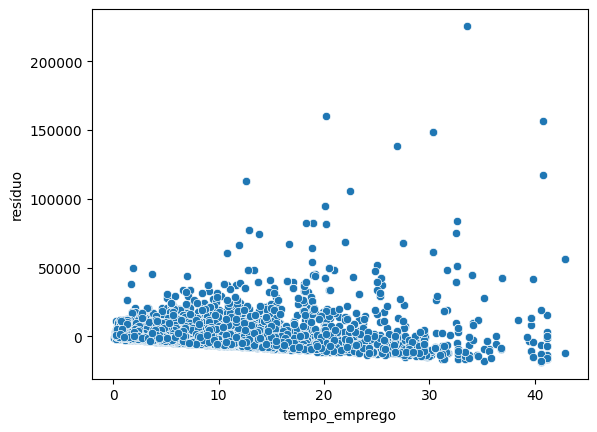

In [17]:
#2. Analisando o resíduo
sns.scatterplot(x= renda['tempo_emprego'], y = reg_renda.resid, data=renda)
plt.xlabel('tempo_emprego')
plt.ylabel('resíduo')

Como o r-quadrado é muito pequeno e o resíduo está mal distribuido, vamos tentar fazer regressões com log, exponenciais e polinomios destas variáveis

In [18]:
reg_renda_log = smf.ols('np.log(renda) ~ tempo_emprego', renda).fit()
reg_renda_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:21:58   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851      0.000       7.816       7.860
tempo_emprego     0.0554      0.001     50.641      0.000       0.053       0.058
==============================================================================
Omnibus:                       33.539   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.792
Skew:                           0.127   Prob(JB):                     4.59e-08
Kurtosis:                       2.969   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'resíduo')

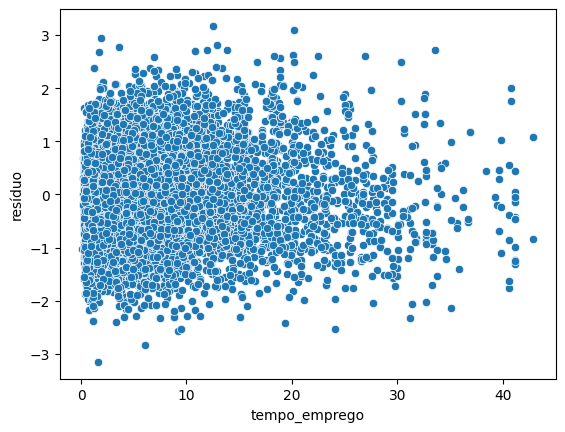

In [19]:
sns.scatterplot(x= renda['tempo_emprego'], y = reg_renda_log.resid, data=renda)
plt.xlabel('tempo_emprego')
plt.ylabel('resíduo')

In [20]:
#Comparando os valores de r-quadrado
renda['pred_renda_log'] = np.exp(reg_renda_log.fittedvalues)
renda[['pred_renda_log', 'renda']].corr().iloc[0,1]**2

0.14818510837938093

In [21]:
reg_renda_exp = smf.ols('renda ~ np.exp(tempo_emprego)', renda).fit()
reg_renda_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                      -0.451
Model:                            OLS   Adj. R-squared:                 -0.451
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 17 Jan 2024   Prob (F-statistic):                nan
Time:                        15:22:04   Log-Likelihood:            -1.3294e+05
No. Observations:               12427   AIC:                         2.659e+05
Df Residuals:                   12426   BIC:                         2.659e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              8.682e-33   6.22e-34     13.963      0.000    7.46e-33     9.9e-33
np.exp(tempo_emprego)   1.81e-14    1.3e-15     13.963      0.000    1.56e-14    2.06e-14
==============================================================================
Omnibus:                    17146.498   Durbin-Watson:                   1.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7210639.698
Skew:                           7.859   Prob(JB):                         0.00
Kurtosis:                     119.956   Cond. No.                     7.41e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.41e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'resíduo')

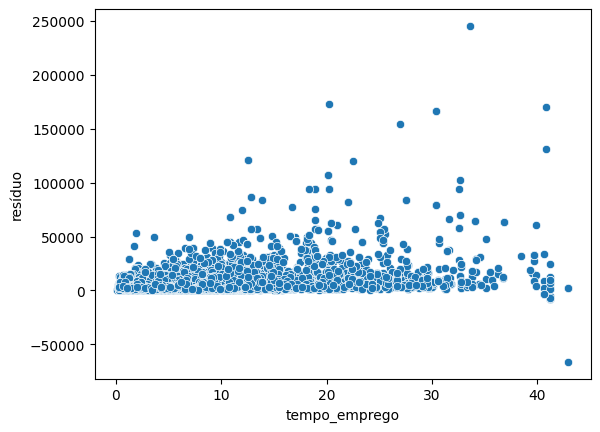

In [22]:
sns.scatterplot(x= renda['tempo_emprego'], y = reg_renda_exp.resid, data=renda)
plt.xlabel('tempo_emprego')
plt.ylabel('resíduo')

In [23]:
reg_renda_pol = smf.ols('np.power(renda,2) ~ tempo_emprego', renda).fit()
reg_renda_pol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.power(renda, 2)   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     513.7
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          1.78e-111
Time:                        15:22:08   Log-Likelihood:            -2.7420e+05
No. Observations:               12427   AIC:                         5.484e+05
Df Residuals:                   12425   BIC:                         5.484e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.001e+08   1.27e+07     -7.909      0.000   -1.25e+08   -7.53e+07
tempo_emprego  2.804e+07   1.24e+06     22.665      0.000    2.56e+07    3.05e+07
==============================================================================
Omnibus:                    34206.160   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1529401479.768
Skew:                          34.715   Prob(JB):                         0.00
Kurtosis:                    1720.230   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'resíduo')

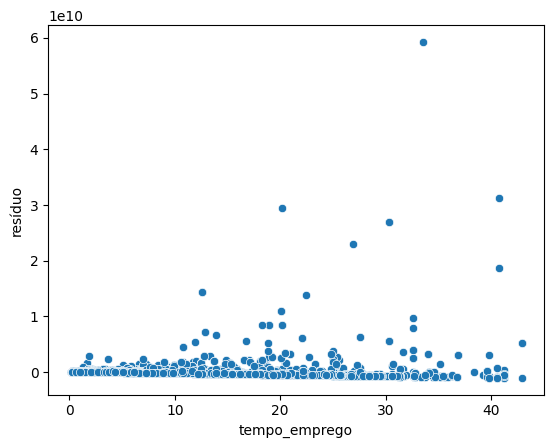

In [24]:
sns.scatterplot(x= renda['tempo_emprego'], y = reg_renda_pol.resid, data=renda)
plt.xlabel('tempo_emprego')
plt.ylabel('resíduo')

In [25]:
#Comparando os valores de r-quadrado
renda['pred_renda_log'] = np.power(reg_renda_log.fittedvalues,0.5)
renda[['pred_renda_log', 'renda']].corr().iloc[0,1]**2

0.14735027073351642

De todos os modelos testados, aquele com maior valor absoluto de r-quadrado é o modelo com regressão exponencial na variavel 'tempo_emprego' (-0,451), já o modelo com o resíduo melhor distribuído é aquele com regressão logarítmica em 'renda'.

In [26]:
#3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
y, X = patsy.dmatrices('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + estado_civil + educacao + tipo_residencia + idade + tempo_emprego', renda)


In [27]:
modelo_renda = sm.OLS(y,X).fit()
modelo_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     185.7
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:22:16   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12403   BIC:                         2.578e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -3089.4648   1004.807     -3.075      0.002   -5059.042   -1119.888
sexo[T.M]                         6051.4091    155.855     38.827      0.000    5745.909    6356.909
posse_de_veiculo[T.True]            48.3249    150.374      0.321      0.748    -246.432     343.082
posse_de_imovel[T.True]            368.1310    148.718      2.475      0.013      76.621     659.641
tipo_renda[T.Bolsista]           -1358.4674   2564.856     -0.530      0.596   -6385.984    3669.049
tipo_renda[T.Empresário]           820.7881    158.813      5.168      0.000     509.490    1132.087
tipo_renda[T.Pensionista]        -2686.8190   2565.510     -1.047      0.295   -7715.617    2341.980
tipo_renda[T.Servidor público]     138.0266    236.328      0.584      0.559    -325.212     601.265
estado_civil[T.Separado]          -107.7415    297.434     -0.362      0.717    -690.759     475.276
estado_civil[T.Solteiro]          -440.7172    217.827     -2.023      0.043    -867.692     -13.743
estado_civil[T.União]             -476.5108    267.717     -1.780      0.075   -1001.279      48.257
estado_civil[T.Viúvo]             -217.1468    443.426     -0.490      0.624   -1086.331     652.038
educacao[T.Pós graduação]         1089.5486   1690.411      0.645      0.519   -2223.920    4403.017
educacao[T.Secundário]             607.3967    765.693      0.793      0.428    -893.481    2108.275
educacao[T.Superior completo]     1224.1466    768.570      1.593      0.111    -282.370    2730.664
educacao[T.Superior incompleto]    220.5729    827.105      0.267      0.790   -1400.681    1841.827
tipo_residencia[T.Casa]           -297.8579    575.827     -0.517      0.605   -1426.567     830.852
tipo_residencia[T.Com os pais]    -387.2379    641.849     -0.603      0.546   -1645.361     870.885
tipo_residencia[T.Comunitário]    -458.9934   1120.531     -0.410      0.682   -2655.409    1737.422
tipo_residencia[T.Estúdio]          79.5298   1056.194      0.075      0.940   -1990.775    2149.834
tipo_residencia[T.Governamental]    81.8554    701.671      0.117      0.907   -1293.528    1457.239
qtd_filhos                         141.3435     92.809      1.523      0.128     -40.577     323.264
idade                               42.0681      8.517      4.939      0.000      25.373      58.763
tempo_emprego                      554.6942     11.044     50.225      0.000     533.046     576.343
==============================================================================
Omnibus:                    17567.671   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9881058.330
Skew:                           8.124   Prob(JB):                         0.00
Kurtosis:                     140.183   

Mais uma vez, as variáveis consideradas estatisticamente insignificante serão aquelas com valor de 'P>|t|' maior que 0.5, que são: tipo_residencia e posse_veiculo.Já outras variáveis de tipo string possuem alguns valores maiores que 'P>|t|' e outros menores, para essas serão criadas variávies dummy. As variáveis e terem dummy serão 'tipo_renda', 'estado_civil' e 'educacao'.

In [28]:
dummy_renda = pd.get_dummies(renda['tipo_renda'].isin(['Bolsista', 'Servidor público']), prefix='renda', dtype=bool)
renda = pd.concat([renda, dummy_renda], axis=1)
renda

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,pred_renda_log,renda_False,renda_True
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34,2.864337,True,False
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15,2.869952,True,False
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89,2.808000,True,False
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77,2.847291,False,True
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97,2.841899,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58,2.933986,True,False
14996,14996,2016-03-01,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45,NaN,True,False
14997,14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82,2.876216,True,False
14998,14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27,2.841952,True,False


In [29]:
dummy_estado_civil = pd.get_dummies(renda['estado_civil'].isin(['Separado', 'Viúvo']), prefix= 'estado_civil', dtype= 'bool')
renda = pd.concat([renda, dummy_estado_civil], axis=1)
renda

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,pred_renda_log,renda_False,renda_True,estado_civil_False,estado_civil_True
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34,2.864337,True,False,True,False
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15,2.869952,True,False,True,False
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89,2.808000,True,False,True,False
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77,2.847291,False,True,True,False
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97,2.841899,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58,2.933986,True,False,True,False
14996,14996,2016-03-01,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45,NaN,True,False,True,False
14997,14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82,2.876216,True,False,True,False
14998,14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27,2.841952,True,False,True,False


In [30]:
dummy_educacao = pd.get_dummies(renda['educacao'].isin(['Pós Graduação', 'Superior incompleto']), prefix='educacao', dtype=bool)
renda = pd.concat([renda, dummy_educacao], axis=1)
renda

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,...,tempo_emprego,qt_pessoas_residencia,renda,pred_renda_log,renda_False,renda_True,estado_civil_False,estado_civil_True,educacao_False,educacao_True
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,...,6.602740,1.0,8060.34,2.864337,True,False,True,False,True,False
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,...,7.183562,2.0,1852.15,2.869952,True,False,True,False,True,False
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,...,0.838356,2.0,2253.89,2.808000,True,False,True,False,True,False
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,...,4.846575,3.0,6600.77,2.847291,False,True,True,False,True,False
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,...,4.293151,1.0,6475.97,2.841899,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,...,13.887671,1.0,7990.58,2.933986,True,False,True,False,True,False
14996,14996,2016-03-01,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,...,NaN,1.0,10093.45,NaN,True,False,True,False,True,False
14997,14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,...,7.832877,2.0,604.82,2.876216,True,False,True,False,True,False
14998,14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,...,4.298630,2.0,3352.27,2.841952,True,False,True,False,True,False


Agora iremos reajustar o modelo, como foram criados dummies para variáveis com valores acima de 0.5, serão consideradas apenas as colunas com dummy falsos.

In [37]:
y_new, X_new = patsy.dmatrices('renda ~ posse_de_imovel + qtd_filhos + idade + tempo_emprego + estado_civil_False + educacao_False + renda_False ', renda.fillna(method = 'bfill'))

C:\Users\samsun\AppData\Local\Temp\ipykernel_10956\602910441.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_new, X_new = patsy.dmatrices('renda ~ posse_de_imovel + qtd_filhos + idade + tempo_emprego + estado_civil_False + educacao_False + renda_False ', renda.fillna(method = 'bfill'))


In [38]:
modelo_renda_corrigido = sm.OLS(y_new, X_new).fit()
modelo_renda_corrigido.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     295.1
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:23:34   Log-Likelihood:            -1.5562e+05
No. Observations:               15000   AIC:                         3.112e+05
Df Residuals:                   14992   BIC:                         3.113e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   1976.4247    512.264      3.858      0.000     972.325    2980.524
posse_de_imovel[T.True]      110.5446    136.796      0.808      0.419    -157.593     378.682
estado_civil_False[T.True]  1125.6093    210.110      5.357      0.000     713.767    1537.451
educacao_False[T.True]       704.9425    332.692      2.119      0.034      52.826    1357.059
renda_False[T.True]         -228.8498    229.650     -0.997      0.319    -678.991     221.291
qtd_filhos                   355.2319     91.020      3.903      0.000     176.821     533.643
idade                        -29.5812      6.432     -4.599      0.000     -42.188     -16.974
tempo_emprego                427.4291      9.726     43.947      0.000     408.365     446.493
==============================================================================
Omnibus:                    21169.654   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11531461.535
Skew:                           8.121   Prob(JB):                         0.00
Kurtosis:                     137.857   Cond. No.                         413.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'resíduo')

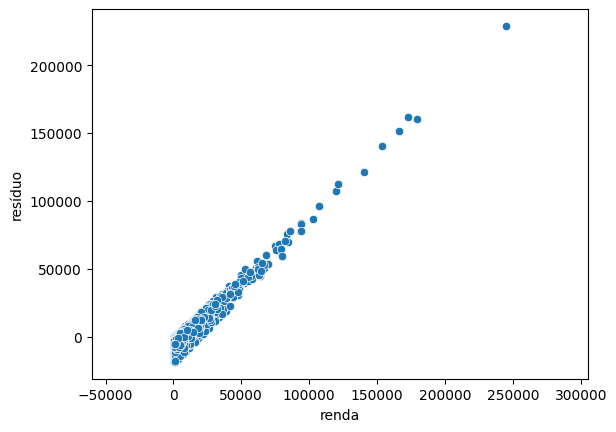

In [39]:
sns.scatterplot(x= renda['renda'], y = modelo_renda_corrigido.resid, data=renda)
plt.axis('equal')
plt.xlabel('renda')
plt.ylabel('resíduo')

Analisando os diferentes modelos, vemos que aquele com o maior valor absoluto de r-quadrafo é o modelo com exponencial de renda, já o modelo com melhor distribuição do resíduo é o modelo onde foi feita regressão do log de renda pelo tempo de emprego.
Obs: no último modelo, para se preencher as colunas de valores 'nan', foi utilizado o método .fillna, o que possui um impacto estatistico no resíduo.